<a href="https://colab.research.google.com/github/DebarghaSamanta/CNN-practice/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zipfileref = zipfile.ZipFile('/content/face-mask-dataset.zip', 'r')
zipfileref.extractall()
zipfileref.close()

In [4]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3514.jpg', 'with_mask_2408.jpg', 'with_mask_3074.jpg', 'with_mask_102.jpg', 'with_mask_305.jpg']
['with_mask_909.jpg', 'with_mask_101.jpg', 'with_mask_817.jpg', 'with_mask_1914.jpg', 'with_mask_1505.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2279.jpg', 'without_mask_469.jpg', 'without_mask_2503.jpg', 'without_mask_1301.jpg', 'without_mask_3333.jpg']
['without_mask_206.jpg', 'without_mask_503.jpg', 'without_mask_2210.jpg', 'without_mask_1379.jpg', 'without_mask_1562.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [9]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
labels = with_mask_labels + without_mask_labels

In [11]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
X = np.array(data)
y = np.array(labels)

In [14]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [16]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [19]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
from tensorflow.keras.models import Sequential

In [71]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(BatchNormalization())

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


In [72]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True
)

In [75]:
history = model.fit(datagen.flow(X_train_scaled, Y_train, batch_size=32),
    validation_data=(X_test_scaled, Y_test),
    epochs=30)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 44s 186ms/step - accuracy: 0.7092 - loss: 9.7564 - val_accuracy: 0.6737 - val_loss: 6.3669
Epoch 2/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 25s 133ms/step - accuracy: 0.7777 - loss: 5.3833 - val_accuracy: 0.7743 - val_loss: 2.8719
Epoch 3/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 24s 129ms/step - accuracy: 0.8389 - loss: 2.4756 - val_accuracy: 0.8802 - val_loss: 1.7884
Epoch 4/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 25s 130ms/step - accuracy: 0.8460 - loss: 1.7573 - val_accuracy: 0.9107 - val_loss: 1.4091
Epoch 5/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 25s 131ms/step - accuracy: 0.8622 - loss: 1.4728 - val_accuracy: 0.9007 - val_loss: 1.2527
Epoch 6/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 25s 131ms/step - accuracy: 0.8805 - loss: 1.2759 - val_accuracy: 0.9047 - val_loss: 1.0593
Epoch 7/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 24s 129ms/step - accuracy: 0.8916 - loss: 1.0474 - val_accuracy: 0.9159 - val_loss: 0.9547
Epoch 8/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 25s 132ms/step - accuracy: 0.9034 - loss: 0

In [76]:
from sklearn.metrics import confusion_matrix
y_pred = (model.predict(X_test_scaled)>0.7).astype(int)
print(confusion_matrix(Y_test,y_pred))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
[[454 314]
 [  0 743]]


In [77]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f'Test Accuracy: {accuracy:.4f}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7599 - loss: 1.0230
Test Accuracy: 0.7379


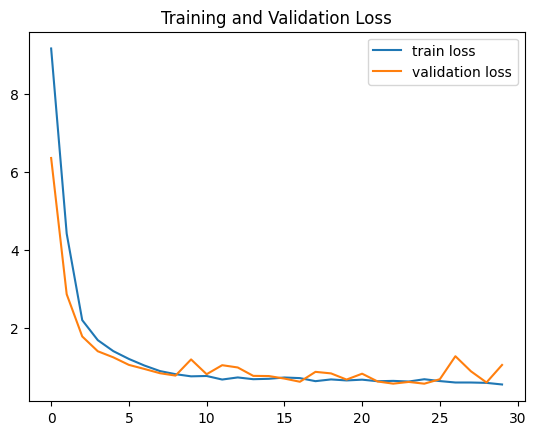

In [78]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

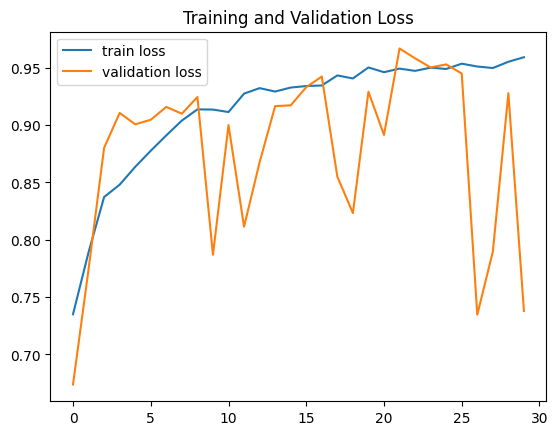

In [79]:
plt.plot(history.history['accuracy'], label='train loss')
plt.plot(history.history['val_accuracy'], label='validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

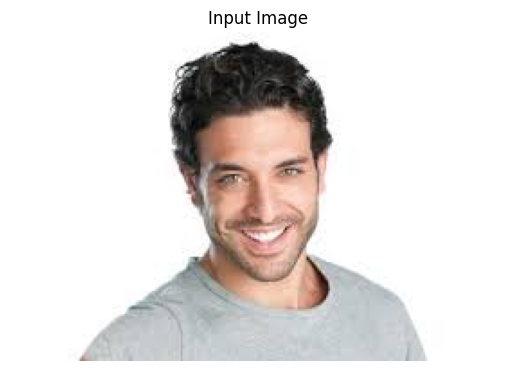

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
Prediction Probability: [[0.9764215]]
Predicted Label: 1
The person in the image is wearing a mask


In [80]:
input_image_path = '/content/data/without_mask/without_mask_1000.jpg'
input_image = cv2.imread(input_image_path)
if input_image is None:
    print("Error: Could not load the image. Please check the file path.")
else:
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Input Image')
    plt.show()
    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = (input_prediction > 0.95).astype(int)[0][0]
    print('Prediction Probability:', input_prediction)
    print('Predicted Label:', input_pred_label)
    print('The person in the image is', 'wearing a mask' if input_pred_label == 1 else 'not wearing a mask')

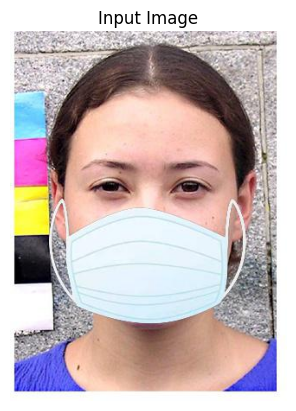

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction Probability: [[0.9764083]]
Predicted Label: 1
The person in the image is wearing a mask


In [81]:
input_image_path = '/content/data/with_mask/with_mask_997.jpg'
input_image = cv2.imread(input_image_path)
if input_image is None:
    print("Error: Could not load the image. Please check the file path.")
else:
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Input Image')
    plt.show()
    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
    input_prediction = model.predict(input_image_reshaped)
    input_pred_label = (input_prediction > 0.7).astype(int)[0][0]
    print('Prediction Probability:', input_prediction)
    print('Predicted Label:', input_pred_label)
    print('The person in the image is', 'wearing a mask' if input_pred_label == 1 else 'not wearing a mask')

In [58]:
input_image_path = 'without_mask_998.jpg'
all_filenames = with_mask_files + without_mask_files

In [61]:
index = all_filenames.index(input_image_path)
actual_label = labels[index]
print(actual_label)

0


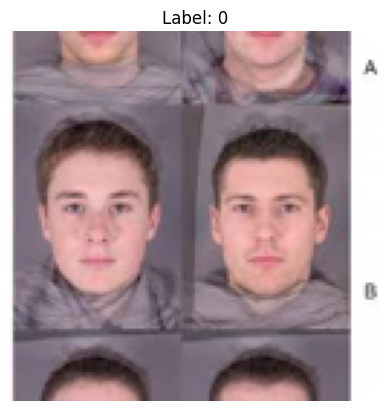

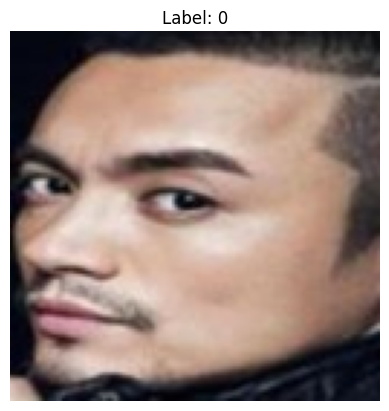

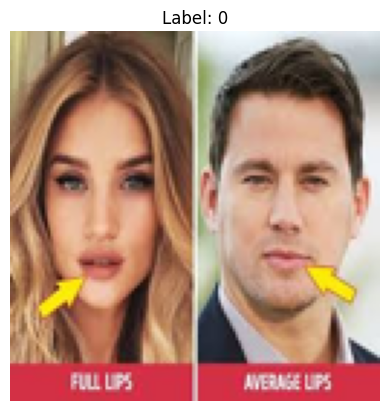

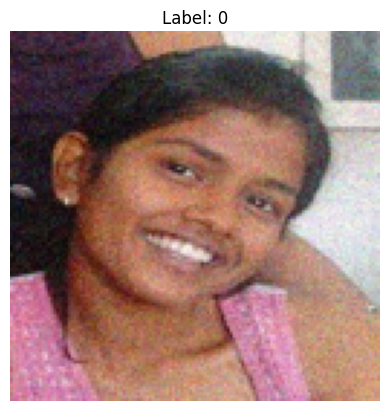

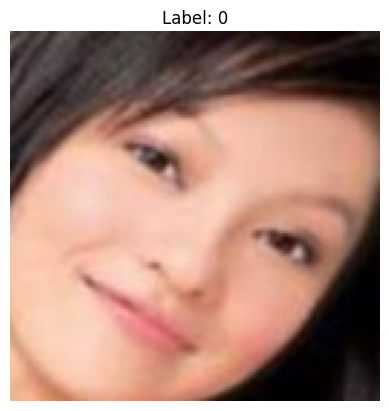

In [64]:
for i in range(5):
    plt.imshow(data[i+3725])
    plt.title(f"Label: {labels[i+3725]}")
    plt.axis('off')
    plt.show()